# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## <font color = 'k'> <b>Aula 1</b>
    
### O que será apresentado ?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<li>Importamos um arquivo chamado tips.csv e armazenamos numa variável chamada dados</li>
<li>Conhecemos os dados que vamos analisar</li>
<li> Por questões didáticas, decidimos traduzir nossa base de dados do inglês para o português</li>
<li> Armazenamos os dados traduzidos em uma nova variável chamada gorjetas </li>
</p>
    
    


## Importando biblioteca

In [406]:
import pandas as pd
import numpy as np

## O Dataset e o Projeto
<hr>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b> total_bill</b> - Valor da conta </li>
    <li><b> tips</b> - Valor da gorjeta</li>
    <li><b> dessert</b> - se foi pedido sobremesa </li>
    <li><b> day</b> - dia da semana</li>
    <li><b> time</b> - almoço/janta</li>
    <li><b> size</b> - quantas pessoas na mesa</li>
    
</ul>

## Importando dados

In [407]:
dados = pd.read_csv('./tips.csv')

In [408]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [409]:
dados.shape

(244, 6)

In [410]:
dados.info() # não temos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


## Renomeando as colunas

In [411]:
dados.rename(columns={'total_bill':'Valor_conta', 'tip':'Gorjeta',
                      'dessert':'Sobremesa','day':'Dia_semana',
                      'time':'Horario','size':'Pessoas'}, inplace=True)
dados.head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Renomeando os campos

In [412]:
dados['Sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

### Renomeando sobremesa

In [413]:
traducao_sobremesa = {'No':'Não', 'Yes': 'Sim'}

In [414]:
dados['Sobremesa'] = dados['Sobremesa'].map(traducao_sobremesa)

# funcao map mapeia os valores fazendo as alteracoes 

In [415]:
dados.head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


### Renomeando dia da semana

In [416]:
dados['Dia_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [417]:
traducao_dia_semana = {'Sun':'Domingo',
                       'Sat':'Sábado',
                       'Thur':'Quinta',
                       'Fri': 'Sexta'}
dados['Dia_semana'] = dados['Dia_semana'].map(traducao_dia_semana)

In [418]:
dados.head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


### Renomeando horário

In [419]:
dados['Horario'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [420]:
traducao_horario = {'Dinner':'Jantar', 'Lunch':'Almoço'}

dados['Horario'] = dados['Horario'].map(traducao_horario)

In [421]:
dados.head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## <font color = 'k'> Aula 2

### O que será apresentado ?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<li>Importamos o Seaborn para gerar diferentes gráficos</li>

<li>Analisamos de forma visual e descritiva o valor da gorjeta em relação ao valor da conta</li>

<li>Criamos diferentes tipos de gráficos</li>

## <font color = 'red'> Análise 1 - Valor da conta e gorjeta

## Importando o seaborn

In [422]:
# intalar o seaborn se necessario : !pip install seaborn = 0.9.0
import seaborn as sns

!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\villa\anaconda3\lib\site-packages
Requires: pandas, matplotlib, scipy, numpy
Required-by: 


In [423]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('CMRmap');

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid');


In [424]:
dados.columns

Index(['Valor_conta', 'Gorjeta', 'Sobremesa', 'Dia_semana', 'Horario',
       'Pessoas'],
      dtype='object')

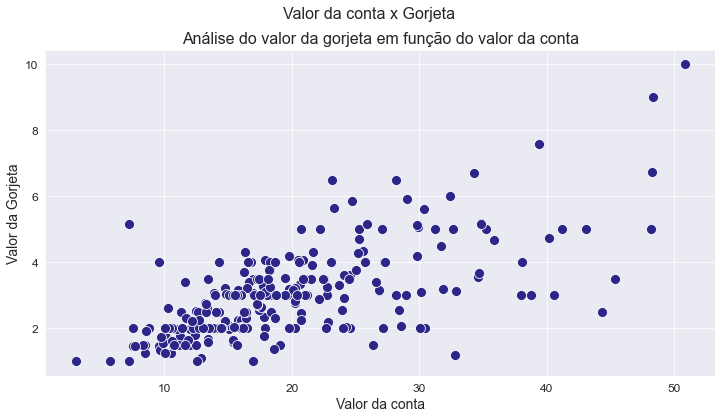

In [425]:
ax = sns.scatterplot(x = 'Valor_conta', y = 'Gorjeta', data = dados, s = 100)
ax.figure.set_size_inches(12,6)

# Titulo e etiquetas
ax.figure.suptitle('Valor da conta x Gorjeta', fontsize = 16)
ax.set_title('Análise do valor da gorjeta em função do valor da conta', fontsize = 16)
ax.set_xlabel('Valor da conta', fontsize = 14)
ax.set_ylabel('Valor da Gorjeta', fontsize = 14)

# Alterando o tamanho dos ticks dos labels
ax.tick_params(labelsize=12)

# Marcadores: s = aumenta o tamanho do marcador

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Pode-se observar que conforme o valor da conta aumenta, a gorjeta também aumenta.<br>
    <b>OBS</b>: não são proporcionais necessariamente!

## Salvando a imagem do gráfico

In [426]:
imagem_1= ax.get_figure()
imagem_1.savefig('imagem_1.png')

 ## Avaliando a proporção do valor da conta com o valor da gorjeta

In [427]:
dados.head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [428]:
dados['Porcentagem'] = (dados['Gorjeta'] / dados['Valor_conta']).round(3)

In [429]:
dados.head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059
1,10.34,1.66,Não,Domingo,Jantar,3,0.161
2,21.01,3.50,Não,Domingo,Jantar,3,0.167
3,23.68,3.31,Não,Domingo,Jantar,2,0.140
4,24.59,3.61,Não,Domingo,Jantar,4,0.147


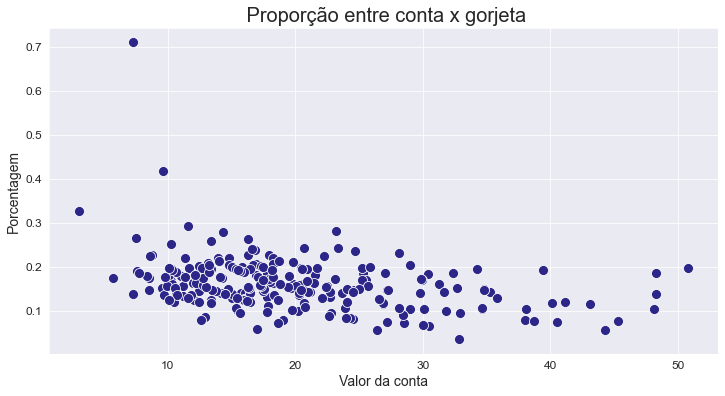

In [430]:
ax = sns.scatterplot(x = 'Valor_conta', y = 'Porcentagem', data = dados, s = 100)
ax.figure.set_size_inches(12,6)

# Titulo e etiquetas
ax.set_title(' Proporção entre conta x gorjeta', fontsize = 20)
ax.set_xlabel('Valor da conta', fontsize = 14)
ax.set_ylabel('Porcentagem', fontsize = 14)

# Alterando o tamanho dos ticks dos labels
ax.tick_params(labelsize=12)

# Marcadores: s = aumenta o tamanho do marcador

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Pode-se observar a relação conta x gorjeta <b>não</b> é proporcional. Quanto maior o valor da conta, menor é a gorjeta. Para contas menores, entre 0 e 10, tiveram um indice maior, tiveram uma proporção melhor. </p>

## Salvando a imagem do gráfico

In [431]:
imagem_2 = ax.get_figure()
imagem_2.savefig('imagem_2.png')

## Outros gráficos para a visualização

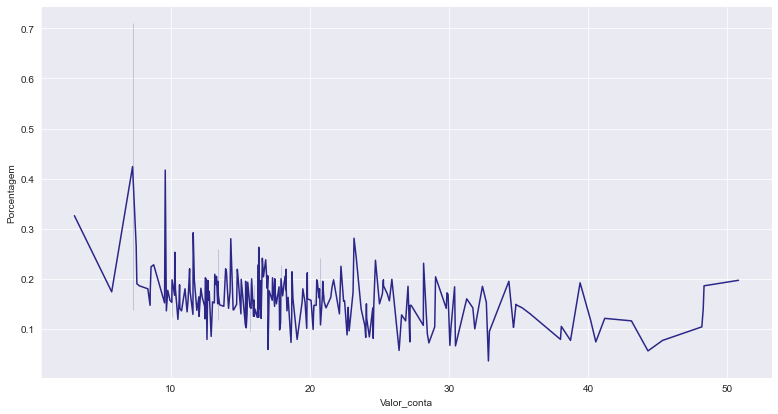

In [432]:
ax = sns.relplot(x = 'Valor_conta', y = 'Porcentagem', data = dados, kind = 'line')
ax.figure.set_size_inches(12,6)

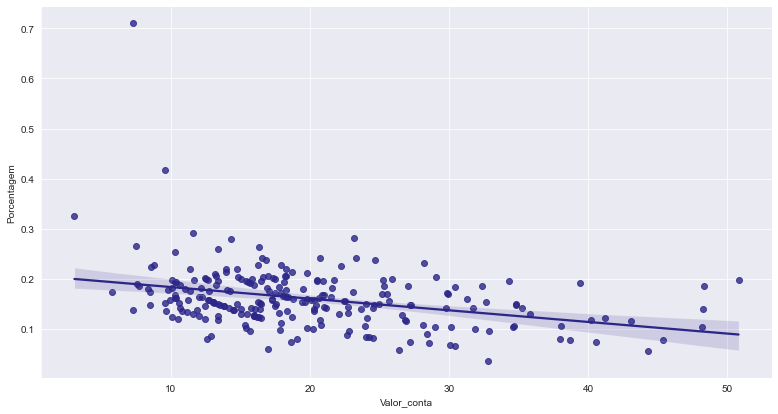

In [433]:
ax = sns.lmplot(x = 'Valor_conta', y = 'Porcentagem', data = dados)
ax.figure.set_size_inches(12,6)


<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Conforme aumenta o valor da conta, temos uma porcentagem menor, esse valor decai.</p>

## <font color = 'k'> <b>Aula 3</b>
### O que será apresentado?

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li>Fizemos uma análise descritiva das pessoas que pediram sobremesa e não pediram sobremesa com a função describe() </li>
    <li>Geramos gráficos alterando a tonalidade com parâmetro hue</li>
    <li>Categorizamos uma informação em gráficos diferentes com o parâmetro col</li>
    <li>Realizamos o teste de hipótese, analisando a porcentagem da gorjeta daqueles que pediram e não pediram sobremesa</li>

</ul>


## <font color = 'red'> Análise 2 - Analisando se pedir sobremesa influência no valor da gorjeta

In [434]:
dados.head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059
1,10.34,1.66,Não,Domingo,Jantar,3,0.161
2,21.01,3.50,Não,Domingo,Jantar,3,0.167
3,23.68,3.31,Não,Domingo,Jantar,2,0.140
4,24.59,3.61,Não,Domingo,Jantar,4,0.147


In [435]:
# outra opcao : dados[dados.Sobremesa == 'Sim']
# query em uma str, como por fora esta aspas simples, interna e aspas duplas

dados.query('Sobremesa == "Sim"').head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas,Porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.079
58,11.24,1.76,Sim,Sábado,Jantar,2,0.157
60,20.29,3.21,Sim,Sábado,Jantar,2,0.158
61,13.81,2.00,Sim,Sábado,Jantar,2,0.145
62,11.02,1.98,Sim,Sábado,Jantar,2,0.180


In [436]:
dados.query('Sobremesa == "Sim"').describe()


,Valor_conta,Gorjeta,Pessoas,Porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085093
min,3.070000,1.000000,1.000000,0.036000
25%,13.420000,2.000000,2.000000,0.107000
50%,17.920000,3.000000,2.000000,0.154000
75%,26.860000,3.680000,3.000000,0.195000
max,50.810000,10.000000,5.000000,0.710000


<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'> Dos 244 registros, 93 deles pediram sobremesa. </p>

In [437]:
dados.query('Sobremesa == "Não"').describe()

,Valor_conta,Gorjeta,Pessoas,Porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159331
std,8.255582,1.377190,1.017984,0.039949
min,7.250000,1.000000,1.000000,0.057000
25%,13.325000,2.000000,2.000000,0.136500
50%,17.590000,2.740000,2.000000,0.156000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.292000


## Plotando o gráfico das pessoas que pediram sobremesa e das que não pediram

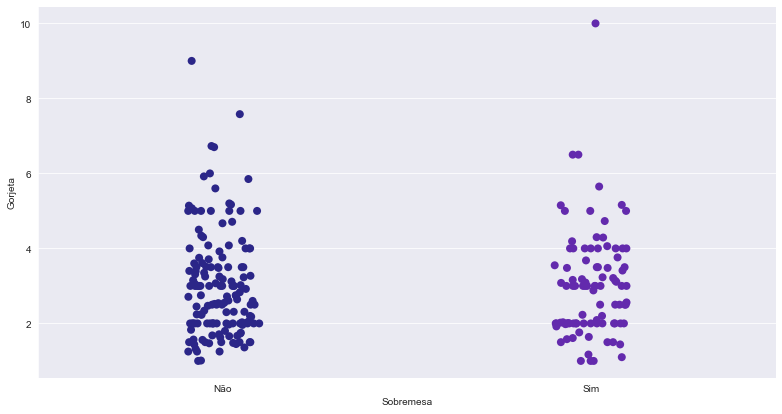

In [438]:
#### Grafico categorico####
ax = sns.catplot(x = 'Sobremesa', y = 'Gorjeta', data = dados, s=8)
ax.figure.set_size_inches(12,6)

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
No gráfico é dificil identificar se pedir a sobremesa sim ou não, influencia no valor da gorjeta.</p>

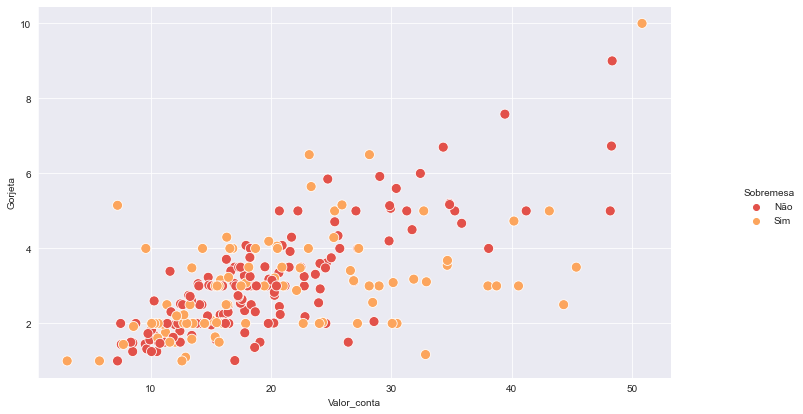

In [439]:
#### Grafico categórico ####

# Cores : diferenciando as especias por cores
sns.set_palette('Spectral');


ax = sns.relplot(x = 'Valor_conta', y = 'Gorjeta', hue = 'Sobremesa', data = dados,s = 100)
ax.figure.set_size_inches(12,6)

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Abaixo estará um gráfico em duas colunas, uma pra  <b>Sim</b> ( há sobremesa)  e outra para <b>Não</b> (sem sobremesa).</p>

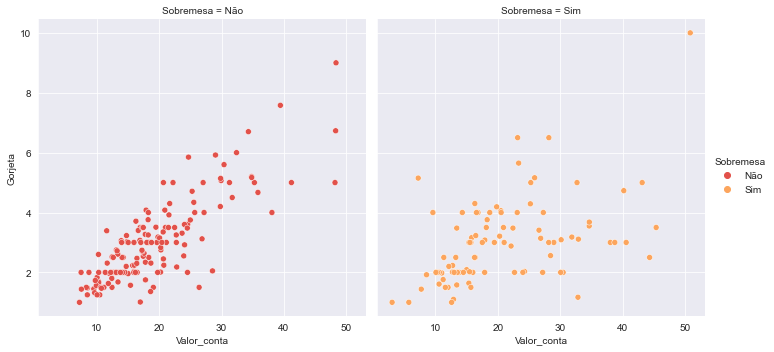

In [440]:
#### Grafico categórico ####
ax = sns.relplot(x = 'Valor_conta', y = 'Gorjeta', hue='Sobremesa', col='Sobremesa', data= dados)

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Mesmo gráfico acima mas ligando através de linhas</p>

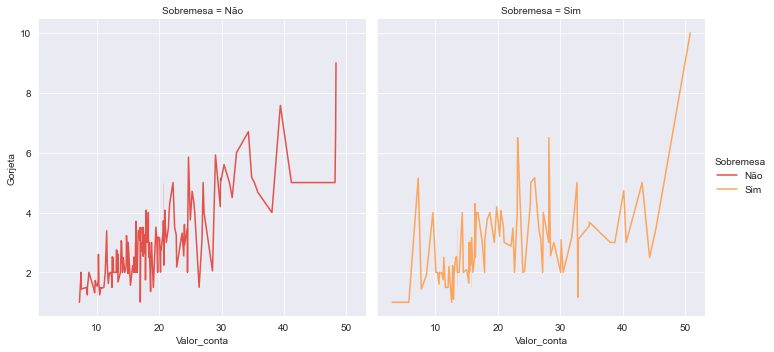

In [441]:
#### Grafico categórico ####
#kind = line
ax = sns.relplot(x = 'Valor_conta', y = 'Gorjeta', hue='Sobremesa', col='Sobremesa', data= dados, kind = 'line')

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
No grafico para <b>Não</b> sobremesa é possivel enxergar uma reta(imaginária), para o gráfico onde tem <b>Sim</b> para sobremesa, os dados aparecem de maneira mais difusa. </p>

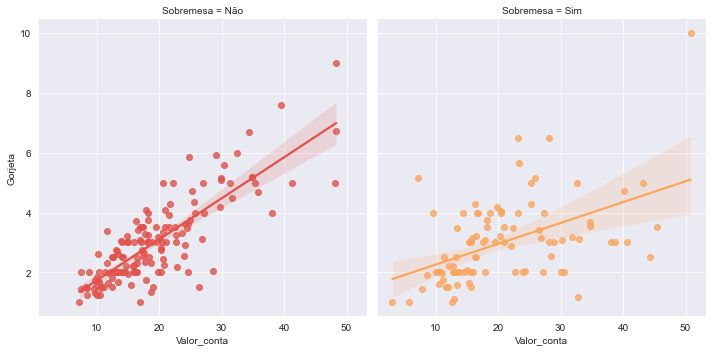

In [442]:
ax = sns.lmplot(x = 'Valor_conta', y = 'Gorjeta', hue='Sobremesa', col='Sobremesa', data= dados)

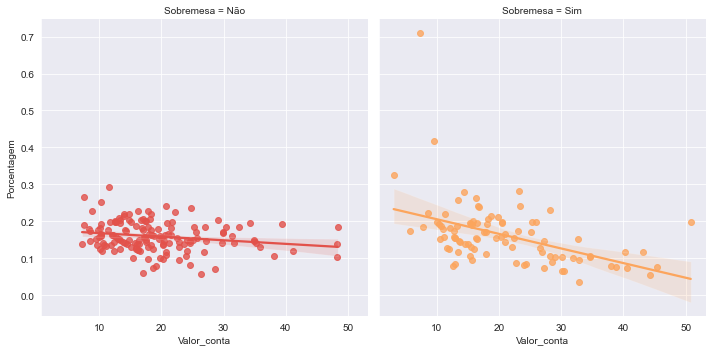

In [443]:
ax = sns.lmplot(x = 'Valor_conta', y = 'Porcentagem', col = 'Sobremesa', hue = 'Sobremesa', data = dados)

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Plotagem do gráfico acima,  relaciona o valor  da conta com a porcentagem (gorjeta/(valor conta)). É possível analisar que existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e dos que não pediram. A gorjeta parece menor para os que pediram sobremesa. </p>

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Mesmo gráfico acima mas ligando através de linhas</p>

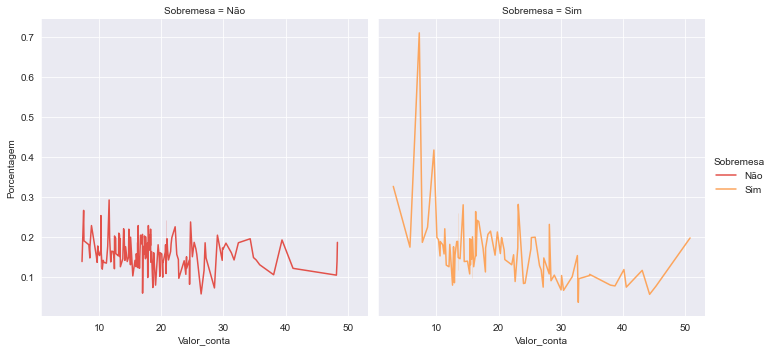

In [444]:
ax = sns.relplot(x = 'Valor_conta', y = 'Porcentagem', hue='Sobremesa', col='Sobremesa', data= dados, kind = 'line')

## Teste de hipótese

<p style='margin: 30px 30px;'>     
<img width='420px' src='./hipotese_nula.jpg'


    

<hr>
<p style='margin: 30px 30px;'>    

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
H<sub>o</sub> = A distribuição da taxa da gorjeta <b>é a mesma</b> nos dois grupos <br>
 H<sub>a</sub> =  A distribuição da taxa da gorjeta <b>é diferente</b> destes dois grupos 

### Importando a biblioteca

In [445]:
from scipy.stats import ranksums

### Separando os grupos de porcentagem dos que pediram sobremesa e os que não prediram sobremesa 

In [446]:
com_sobremesa = dados.query('Sobremesa == "Sim"')['Porcentagem']
com_sobremesa.head()

56    0.079
58    0.157
60    0.158
61    0.145
62    0.180
Name: Porcentagem, dtype: float64

In [447]:
sem_sobremesa = dados.query('Sobremesa == "Não"')['Porcentagem']
sem_sobremesa.head()

0    0.059
1    0.161
2    0.167
3    0.140
4    0.147
Name: Porcentagem, dtype: float64

### Obtendo o P<sub>value</sus>

In [448]:
r = ranksums(com_sobremesa, sem_sobremesa)

print('O valor de p-value é de {:.4f}'.format(r.pvalue))

O valor de p-value é de 0.5677


<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Um P<sub>value</sub> = 0.5676 significa que apesar dos grupos terem gorjetas diferentes entre si, matematicamente essa diferença é insignificante. Temos um p-value maior que um nivel de 
significância 5% (95% de nível de confiança).
<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
H<sub>o</sub> = A distribuição da taxa da gorjeta <b>é a mesma</b> nos dois grupos <br>

## <font color = 'k'> <b>Aula 4</b>
### O que será apresentado?

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li>Analisamos o valor da conta e da gorjeta de cada dia da semana </li>
    <li>Em nossa análise descritiva, conferimos também a frequência de cada dia</li>
    <li>Geramos também diferentes tipos de gráficos para uma análise exploratória visual</li>
</ul>


## <font color = 'red'> Analise 3 - Analisando se os dias da semana influenciam no valor da gorjeta

In [449]:
dados.head()

,Valor_conta,Gorjeta,Sobremesa,Dia_semana,Horario,Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059
1,10.34,1.66,Não,Domingo,Jantar,3,0.161
2,21.01,3.50,Não,Domingo,Jantar,3,0.167
3,23.68,3.31,Não,Domingo,Jantar,2,0.140
4,24.59,3.61,Não,Domingo,Jantar,4,0.147


In [450]:
dados['Dia_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

### Plotando um gráfico com o dia da semana e o valor da conta para ver qual dia da semana as pessoas gastam mais

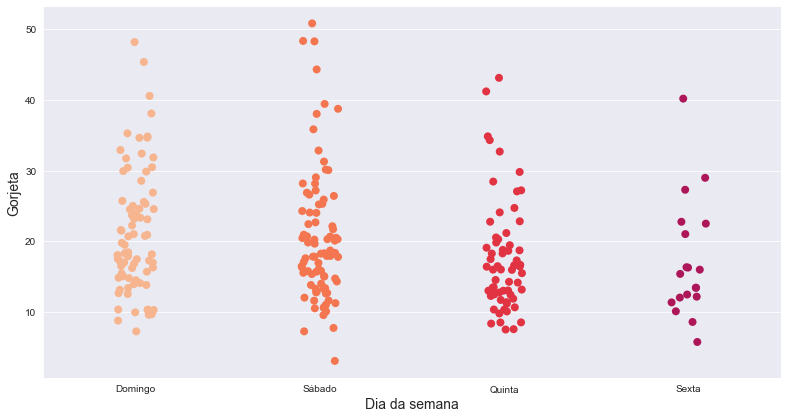

In [451]:
#### Gráfico categórico ####
sns.set_palette('rocket_r');

ax = sns.catplot(x = 'Dia_semana', y = 'Valor_conta', data = dados, s=8)
ax.figure.set_size_inches(12,6)
ax.set_xlabels('Dia da semana',fontsize = 14)
ax.set_ylabels('Gorjeta',fontsize = 14)

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'> É possível notar que na sexta o valor da conta é menor, e no sábado o valor é mais acentuado que os demais.

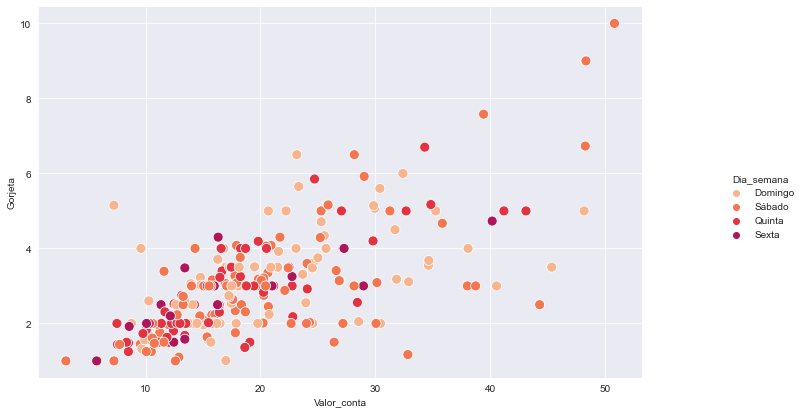

In [452]:
# hue = mudara a coloracao de acordo com o dia da semana
ax = sns.relplot(x = 'Valor_conta', y = 'Gorjeta', data = dados, hue= 'Dia_semana', s = 100)
ax.figure.set_size_inches(12,6)

## Plot analisando a gorjeta com os dias da semana

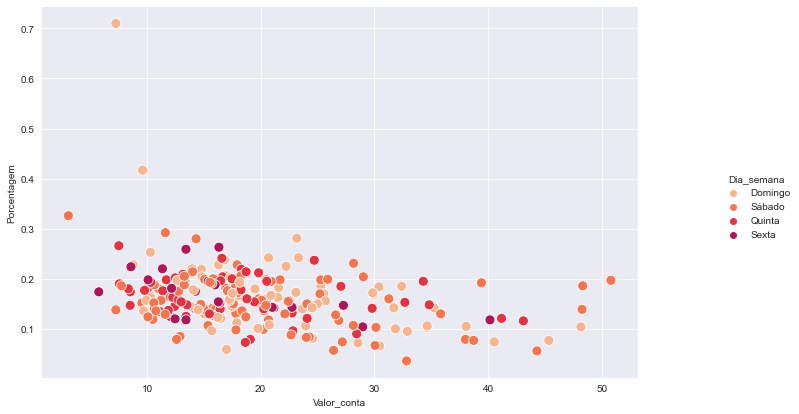

In [453]:
# hue = mudara a coloracao de acordo com o dia da semana
ax = sns.relplot(x = 'Valor_conta', y = 'Porcentagem', data = dados, hue= 'Dia_semana', s = 100)
ax.figure.set_size_inches(12,6)

## Plot analisando a gorjeta em cada dia separadamente

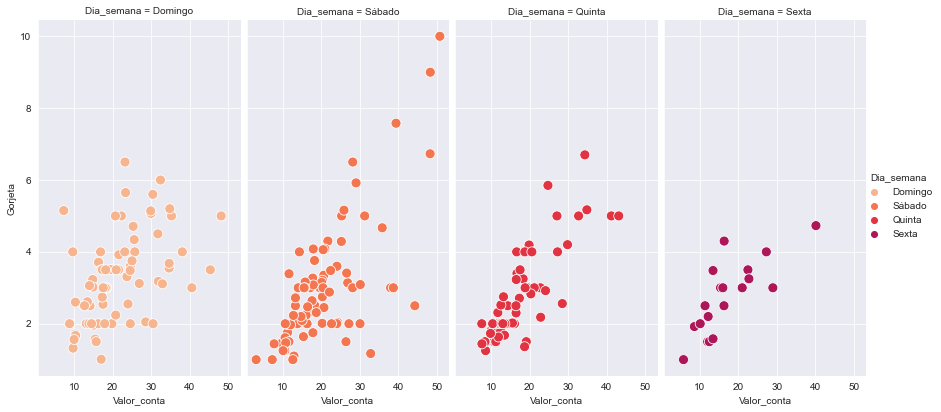

In [454]:
#### Plot analisando a porcentagem ####
# hue = mudara a coloracao de acordo com o dia da semana
# col = foi usada para separar por colunas de acordo com o dia da semana
ax = sns.relplot(x = 'Valor_conta', y = 'Gorjeta', data = dados, hue= 'Dia_semana',col = 'Dia_semana', s = 100)
ax.figure.set_size_inches(12,6)
ax.add_legend(fontsize = 80) # mover a legenda


## Plot analisando a porcentagem ( Gorjeta/ Valor_conta) em cada dia separadamente

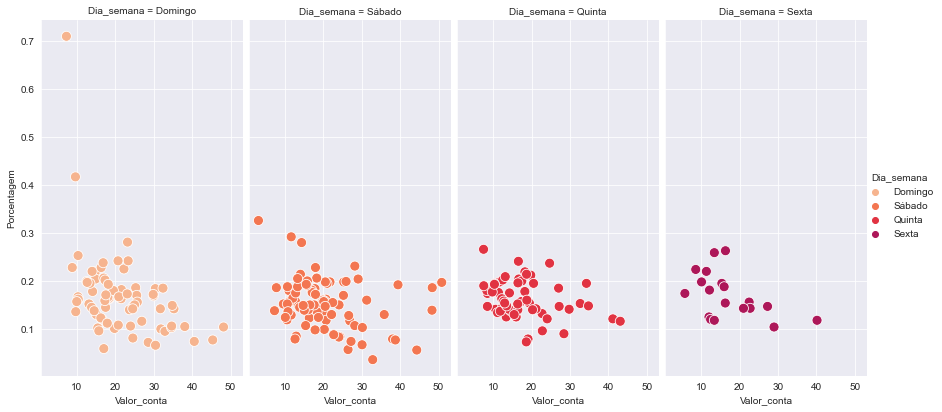

In [455]:
#### Plot analisando a porcentagem ####
# hue = mudara a coloracao de acordo com o dia da semana
# col = foi usada para separar por colunas de acordo com o dia da semana
ax = sns.relplot(x = 'Valor_conta', y = 'Porcentagem', data = dados, hue= 'Dia_semana',col = 'Dia_semana', s = 100)
ax.figure.set_size_inches(12,6)
ax.add_legend(fontsize = 80) # mover a legenda

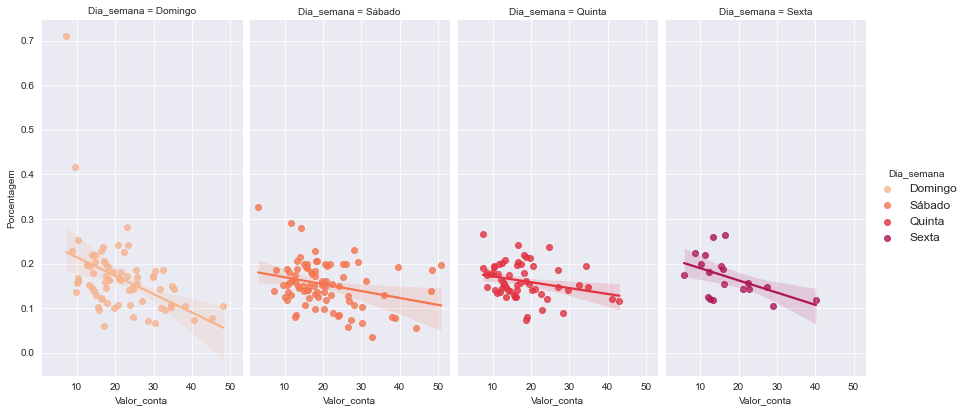

In [456]:
#### Plot analisando a porcentagem ####
# hue = mudara a coloracao de acordo com o dia da semana
# col = foi usada para separar por colunas de acordo com o dia da semana

# Traçando uma linha, sera mudado para o lmplot
ax = sns.lmplot(x = 'Valor_conta', y = 'Porcentagem', data = dados, hue= 'Dia_semana',col = 'Dia_semana')
ax.figure.set_size_inches(12,6)
ax.add_legend(fontsize = 12) # mover a legenda

### Obtendo as médias gerais das gorjetas

In [457]:
media_geral_gorjeta = dados['Gorjeta'].mean()
print('A média geral das gorjetas é igual a {:.3f}'.format(media_geral_gorjeta))

A média geral das gorjetas é igual a 2.998


In [458]:
# Média por dia da semana
dados.groupby('Dia_semana').mean()[['Valor_conta', 'Gorjeta', 'Porcentagem']].round(2)

,Valor_conta,Gorjeta,Porcentagem
Dia_semana,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sexta,17.15,2.73,0.17
Sábado,20.44,2.99,0.15


### Quantidade de pessoas por dia da semana

In [459]:
dados.groupby('Dia_semana').sum()['Pessoas'].to_frame()

,Pessoas
Dia_semana,
Domingo,216
Quinta,152
Sexta,40
Sábado,219


<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
No sábado temos mais pessoas do que no domingo (pouca diferença), e a média da gorjeta no domingo é maior que no sábado</p>

## Teste de hipótese

<p style='margin: 30px 30px;'>     
<img width='420px' src='./hipotese_nula.jpg'


    

<hr>
<p style='margin: 30px 30px;'>    

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
H<sub>o</sub> = A distribuição do valor da conta <b>é a mesma</b> no sábado e no domingo <br>
 H<sub>a</sub> =  A distribuição do valor da conta <b>é diferente</b> no sábado e no domingo

In [460]:
from scipy.stats import ranksums

In [461]:
conta_no_domingo = dados.query('Dia_semana == "Domingo"')['Valor_conta']
conta_no_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: Valor_conta, Length: 76, dtype: float64

In [462]:
conta_no_sabado =dados.query('Dia_semana == "Sábado"')['Valor_conta']
conta_no_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: Valor_conta, Length: 87, dtype: float64

In [564]:
r_2 = ranksums(conta_no_domingo, conta_no_sabado)

print('O valor de p-value é de {:.4f}'.format(r_2.pvalue))

O valor de p-value é de 0.3577


<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Como o p-value é de 0.3577, não podemos rejeitar a hipótese nula para um nível de significância de 5%.<br> Ou seja, a distribuição do valor da conta <b>é a mesma</b> no sábado e no domingo. <br>

## <font color = 'k'> <b>Aula 5</b>
### O que será apresentado?

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li>Analisamos de forma visual e descritiva as diferenças entre os valores das contas do almoço e do jantar </li>
    <li>Aprendemos a gerar diferentes gráficos, como um histograma, gráfico de violino e um boxplot com Seaborn</li>
</ul>

## <font color = 'red'> Analise 4 - Analisando se a janta ou almoço influencia na gorjeta

In [477]:
dados.columns

Index(['Valor_conta', 'Gorjeta', 'Sobremesa', 'Dia_semana', 'Horario',
       'Pessoas', 'Porcentagem'],
      dtype='object')

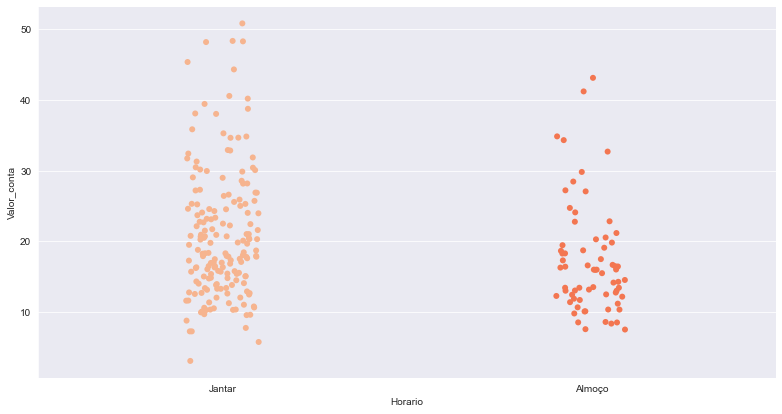

In [494]:
ax = sns.catplot(x = 'Horario', y = 'Valor_conta', data = dados, s = 6)
ax.figure.set_size_inches(12,6)

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'> Visualmente, o valor da conta é maior na janta no que no almoço.

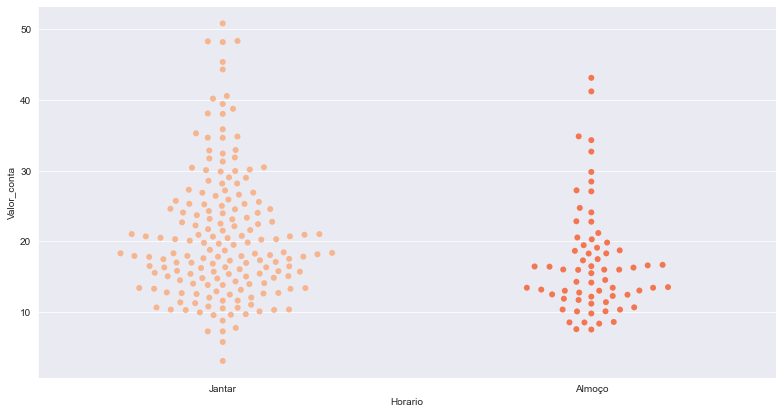

In [493]:
# kind = swarm deixa os dados mais separados para enxergar melhor os pontos
ax = sns.catplot(x = 'Horario', y = 'Valor_conta', data = dados, s = 6, kind = 'swarm')
ax.figure.set_size_inches(12,6)

### Gráfico violinplot

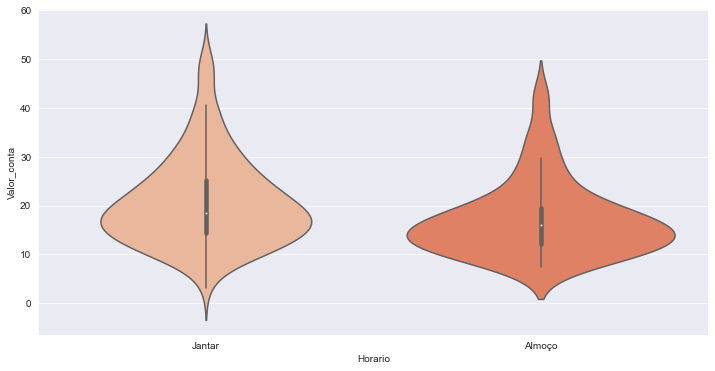

In [496]:
ax = sns.violinplot(x = 'Horario', y = 'Valor_conta', data = dados, s = 6, kind = 'swarm')
ax.figure.set_size_inches(12,6)

### Box-plot

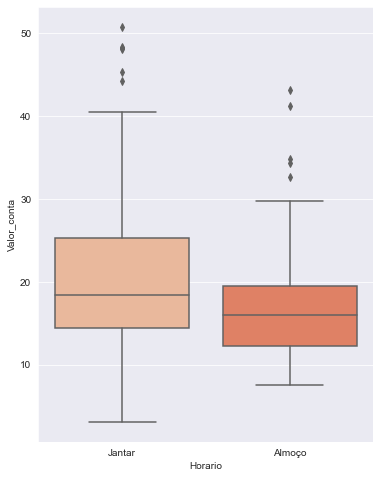

In [507]:
ax = sns.boxplot(x = 'Horario', y = 'Valor_conta', data = dados)
ax.figure.set_size_inches(6,8)

### Histograma

In [516]:
almoco = dados.query('Horario == "Almoço"')['Valor_conta']
almoco.head()

77    27.20
78    22.76
79    17.29
80    19.44
81    16.66
Name: Valor_conta, dtype: float64

In [517]:
jantar = dados.query('Horario == "Jantar"')['Valor_conta']
jantar.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: Valor_conta, dtype: float64

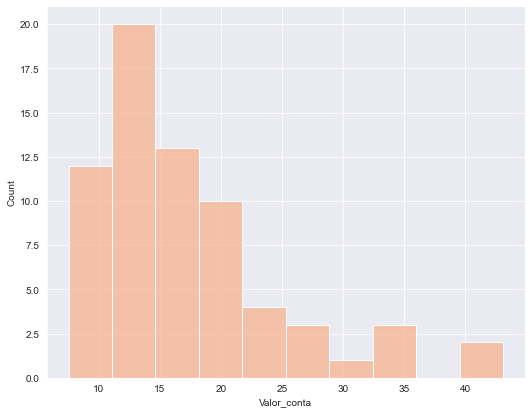

In [551]:
ax = sns.displot(x = almoco, kde = False)
ax.figure.set_size_inches(8,6)

C:\Users\villa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


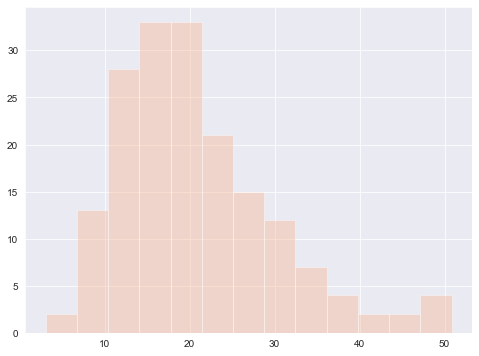

In [550]:
ax = sns.distplot(x = jantar, kde = False)
ax.figure.set_size_inches(8,6)

In [560]:
horario = dados.groupby('Horario').mean()[['Valor_conta', 'Gorjeta', 'Porcentagem']].round(4)

,Valor_conta,Gorjeta,Porcentagem
Horario,,,
Almoço,17.1687,2.7281,0.1641
Jantar,20.7972,3.1027,0.1595


## Teste de hipótese

<p style='margin: 30px 30px;'>     
<img width='420px' src='./hipotese_nula.jpg'


    

<hr>
<p style='margin: 30px 30px;'>    

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
H<sub>o</sub> = A distribuição do valor da conta <b>é a mesma</b> no almoço e na janta <br>
 H<sub>a</sub> =  A distribuição do valor da conta <b>é diferente</b> no almoço e na janta

In [566]:
r_3 = ranksums(almoco, jantar)
print('O valor de p-value é de {:.4f}'.format(r_3.pvalue))

O valor de p-value é de 0.0012


<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Como o p-value é de 0.0012, para um nível de significância de 5% rejeitamos a hipótese nula e aceitamos a hipótese alternativa, ou seja, a distribuição do valor da conta <b>é diferente</b> no almoço e na janta.

In [571]:
porcentagem_almoco = dados.query('Horario == "Almoço"')['Porcentagem']
porcentagem_almoco

77     0.147
78     0.132
79     0.157
80     0.154
81     0.204
       ...  
222    0.224
223    0.188
224    0.118
225    0.154
226    0.198
Name: Porcentagem, Length: 68, dtype: float64

In [572]:
porcentagem_jantar = dados.query('Horario == "Jantar"')['Porcentagem']
porcentagem_jantar

0      0.059
1      0.161
2      0.167
3      0.140
4      0.147
       ...  
239    0.204
240    0.074
241    0.088
242    0.098
243    0.160
Name: Porcentagem, Length: 176, dtype: float64

## Teste de hipótese

<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
H<sub>o</sub> = A distribuição da porcentagem (Gorjeta/Valor_conta) <b>é a mesma</b> no almoço e na janta <br>
 H<sub>a</sub> =  A distribuição da porcentagem (Gorjeta/Valor_conta) <b>é diferente</b> no almoço e na janta

In [579]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.23027859883366675


<p style = 'font-size: 18px; line-height:2; margin: 10px 50px; text-align: justify;'>
Como o p-value é de 0.2303, para um nível de significância de 5%  não rejeitamos, ou seja, A distribuição da porcentagem (Gorjeta/Valor_conta) <b>é a mesma</b> no almoço e na janta <br>